In [2]:
import math
import os
from tqdm import tqdm
from time import time

import numpy as np
from numpy import *
import cv2 as cv
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from colorspacious import cspace_converter
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import pandas as pd

In [3]:
def get_colorbar_list(cm):
    """
    计算色度条中所有的像素点
    :param cm: 使用LinearSegmentedColormap.from_list构造的色度条
    :return: [[1, 1, 1], [0.2, 0.3, 0.4], [0.4, 0.6 , 0.5]...]
    """
    color_list = [[cm(i)[0],cm(i)[1],cm(i)[2] ]for i in range(cm.N)]
    np_list = np.array(color_list)
    # np.savetxt('black2read_cmp.txt',npList,fmt='%.3e') # 存储数据
    
    return np_list

In [9]:
def structure_uint_bar(colors=[(255, 255, 255),(255, 245, 230)]):
    """
    构造阶段色条
    """
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     colors = [(255, 255, 255),(255, 245, 230), #(255, 200, 200),
#               #(255, 230, 220), (255, 220, 200),
#               (255, 220, 180),(255, 220, 130),
#               [255, 213, 100],(255, 180, 100),(255, 155, 51),
#               (99, 71, 75)]
    # 对colors做归一化处理
    for i in range(len(colors)):
        colors[i] = list(colors[i])
        for j in range(len(colors[i])):

            colors[i][j] = colors[i][j] / 256
        colors[i] = tuple(colors[i])

    cmap_name = 'my_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=20)
    
    # 获取色条中的每个像素
    color_list = [[cm(i)[0],cm(i)[1],cm(i)[2] ]for i in range(cm.N)]
    np_list = list(color_list)
    
    return list(np_list)

In [10]:
def structure_uint_bar(colors=[(255, 255, 255),(255, 245, 230)], num=20):
    """
    构造阶段色条
    :param num:色条的插值个数
    """
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     colors = [(255, 255, 255),(255, 245, 230), #(255, 200, 200),
#               #(255, 230, 220), (255, 220, 200),
#               (255, 220, 180),(255, 220, 130),
#               [255, 213, 100],(255, 180, 100),(255, 155, 51),
#               (99, 71, 75)]
    # 对colors做归一化处理
    for i in range(len(colors)):
        colors[i] = list(colors[i])
        for j in range(len(colors[i])):

            colors[i][j] = colors[i][j] / 256
        colors[i] = tuple(colors[i])

    cmap_name = 'my_cmap'
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=num)
    
    # 获取色条中的每个像素
    color_list = [[cm(i)[0],cm(i)[1],cm(i)[2] ]for i in range(cm.N)]
    np_list = list(color_list)
    
    return list(np_list)

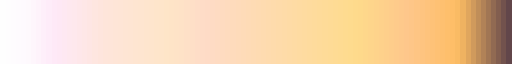

In [11]:
def structure_bar():
    """
    构造色条
    """
    
    # 配置色条各分段的参数
#     white_bar = structure_uint_bar(colors=[(255, 255, 255),(255, 245, 230)])
#     yellowish_bar = structure_uint_bar(colors=[(255, 245, 230), (255, 220, 180),(255, 220, 130)])
#     yellow_bar = structure_uint_bar(colors=[(255, 220, 130), [255, 213, 100],(255, 180, 100)])
#     brown_bar = structure_uint_bar(colors=[(255, 180, 100), (255, 164, 105),(255, 160, 65)])
#     gray_bar = structure_uint_bar(colors=[(255, 160, 65), (255, 155, 51),(99, 71, 75)])
    
    white_bar = structure_uint_bar(colors=[(255, 255, 255),[255, 251, 255],(255, 234, 249),(255, 233, 236),(255, 230, 220)])
    yellowish_bar = structure_uint_bar(colors=[(255, 230, 220), (255, 230, 210), (255, 230, 200), (255, 220, 200)])
    yellow_bar = structure_uint_bar(colors=[(255, 220, 200), [255, 220, 180],(255, 220, 160)])
    brown_bar = structure_uint_bar(colors=[(255, 220, 160), (255, 220, 140), (255, 200, 140)])
    gray_bar = structure_uint_bar(colors=[(255, 200, 140), (255, 190, 100),(99, 71, 75)])
    
    colors = white_bar + yellowish_bar[1:] + yellow_bar[1:]  + brown_bar[1:] + gray_bar[1:]

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
    # 绘制色条
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
#                  cax=ax, orientation='horizontal', label='coating color')
    
    return cm

structure_bar()

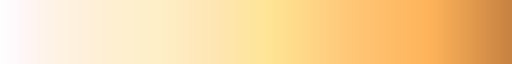

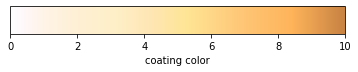

In [19]:
def structure_bar2():
    """
    构造色条
    """
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    
    # 配置色条各分段的参数
    white_bar = structure_uint_bar(colors=[(255, 255, 255),[255, 249, 251],[255, 246, 241],[255, 244, 230]], num=100)
    yellowish_bar = structure_uint_bar(colors=[[255, 244, 230], (255, 240, 212), (255, 240, 200)], num=200)
    yellow_bar = structure_uint_bar(colors=[(255, 240, 200), [255, 230, 180],(255, 230, 150)], num=200)
    brown_bar = structure_uint_bar(colors=[(255, 230, 150), (255, 200, 120), (255, 180, 90), [200, 130, 66]], num=450)
    
    colors = white_bar + yellowish_bar[1:] + yellow_bar[1:]  + brown_bar[1:]

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=1000)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
        # 绘制色条
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
                 cax=ax, orientation='horizontal', label='coating color')
    
    return cm

structure_bar2()

In [14]:
def structure_bar2():
    """
    构造色条
    """
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    
    # 配置色条各分段的参数
    white_bar = structure_uint_bar(colors=[(255, 255, 255),[255, 249, 251],[255, 246, 241],[255, 244, 230]], num=10)
    yellowish_bar = structure_uint_bar(colors=[[255, 244, 230], (255, 240, 212), (255, 240, 200)])
    yellow_bar = structure_uint_bar(colors=[(255, 240, 200), [255, 230, 180],(255, 230, 150)])
    brown_bar = structure_uint_bar(colors=[(255, 230, 150), (255, 200, 120), (255, 180, 90), [200, 130, 66]], num=45)
    
    colors = white_bar + yellowish_bar[1:] + yellow_bar[1:]  + brown_bar[1:]

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
        # 绘制色条
    fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
                 cax=ax, orientation='horizontal', label='coating color')
    
    return cm

structure_bar2()

SyntaxError: invalid syntax (3267478242.py, line 11)

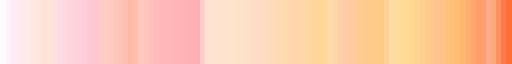

In [8]:
def structure_bar3():
    """
    构造色条
    """
    
    # 配置色条各分段的参数
    white_bar1 = structure_uint_bar(colors=[[255, 223, 234], [255, 215, 226], [255, 213, 220], [255, 204, 220], [255, 200, 208], [255, 208, 196], [255, 201, 188], [255, 194, 183],(255, 183, 161)], num=15)    
    white_bar2 = structure_uint_bar(colors=[[255, 251, 255],(255, 236, 249),(255, 235, 236),(255, 235, 228),(255, 228, 220),(255, 228, 216)], num=10)
    yellowish_bar1 = structure_uint_bar(colors=[(255, 228, 216), (255, 228, 210), (255, 230, 200), (255, 220, 200)], num=12)
    yellowish_bar2 = structure_uint_bar(colors=[(255, 210, 190), (255, 189, 190), (255, 183, 181), (255, 175, 183)], num=13)
    yellow_bar1 = structure_uint_bar(colors=[(255, 220, 200), [255, 220, 180],(255, 215, 170),(255, 215, 150)], num=13)
    yellow_bar2 = structure_uint_bar(colors=[(255, 229, 172), [255, 204, 170],[255, 204, 144], [255, 204, 134]], num=12)
    brown_bar1 = structure_uint_bar(colors=[(255, 220, 173), (255, 220, 160), (255, 220, 145), (255, 210, 145),(255, 200, 140)], num=10)
    brown_bar2 = structure_uint_bar(colors=[(255, 196, 155), (255, 196, 130), (255, 192, 114), (255, 173, 114), (255, 152, 101)], num=10)
    brown_bar3 = structure_uint_bar(colors=[(255, 174, 146), (255, 174, 120), (255, 128, 82), (255, 112, 56)], num=5)
    # gray_bar = structure_uint_bar(colors=[(255, 200, 140), (255, 190, 100),(99, 71, 75)])
    
    colors = white_bar2 + white_bar1 +  yellowish_bar2[1:] + yellowish_bar1[1:] + yellow_bar1[1:]  + yellow_bar2[1:] \
             + brown_bar1[1:] + brown_bar2[1:] + brown_bar3[0:]

    cmap_name = 'my_cmap'
    
    cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=100)
    norm = mpl.colors.Normalize(vmin=0, vmax=10)
    
    # 绘制色条
#     fig, ax = plt.subplots(figsize=(6, 1))
#     fig.subplots_adjust(bottom=0.5)
#     fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cm),
#                  cax=ax, orientation='horizontal', label='coating color')
    
    return cm

structure_bar3()

In [20]:
import random

In [31]:
random.uniform(-0.2, 0.2)

-0.16212987478057217